In [7]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib.ticker import MaxNLocator, LogLocator
from matplotlib import cm
import h5py
import os
from mpl_toolkits.mplot3d import axes3d
from cycler import cycler
from scipy.interpolate import griddata
import matplotlib.patches as patches
from math import pi, sqrt
from scipy.optimize import curve_fit
import scipy
from matplotlib.colors import LinearSegmentedColormap
import random
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [8]:
# Plot parameters
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['axes.labelsize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['xtick.major.size'] = 20
matplotlib.rcParams['ytick.major.size'] = 20
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['lines.linewidth'] = 3

In [15]:
# Plot Constraint convergence

def EllipticConstraintConvergence(Spins, figname):

    plt.figure(figsize=(6.0,5.0))
    cmap = matplotlib.cm.get_cmap('magma')
    Colors = [cmap(float(i+1)/(len(Spins)+1)) for i in range(len(Spins))]
    
    for spin, color in zip(Spins, Colors):   
        ham, hamN, mom, momN = np.loadtxt('Constraints/Constraints' + spin + '.dat', \
                                          comments="#",usecols=([1,2,3,4]),unpack=True)
        ham = ham/hamN
        mom = mom/momN
        bb = np.sqrt(ham**2 + mom**2)
        k = range(0,len(ham))
        res = [(5+2*K)*(6+2*K) for K in k]
        plt.plot(res, np.abs(bb),'-o',lw=1.0,marker='*',markersize=10,label=spin,c=color)

    plt.ylabel('Normalized $\|\Delta \mathrm{Constraint}\|_\mathrm{L2}$')
    plt.xlabel(r'$N_R \times N_L $')
    #plt.ylim(1e-12, 1e-2)
    plt.yscale('log')
    legend = plt.legend(frameon=False, title=r'$\chi$')
    plt.setp(legend.get_title(),fontsize=20)
    plt.tight_layout()
    plt.savefig(figname)
    plt.show()

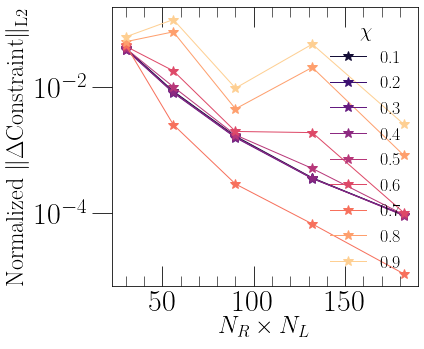

In [16]:
Spins = ['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9']
EllipticConstraintConvergence(Spins, 'EllipticSolvingConvergence.pdf')

# Plotting the time derivatives from Leo's notebook

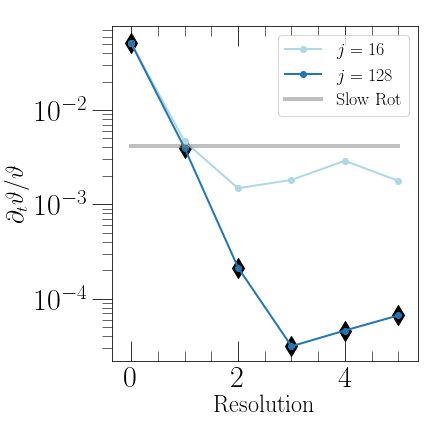

In [223]:

def PlotDtNotebook(Levs):
    fig, ax = plt.subplots(1, sharex=True, figsize=(6,6))
    Dt16 = []
    Dt128 = []
    DtSlow = []
    for lev in Levs:
        p = 'LeoSolutionCompareID/Save16/Lev' + str(lev) + '_AA/TimeDerivs.dat'
        dt, norm, stat = np.loadtxt(p, comments="#",usecols=([1,2,3]),unpack=True)
        Dt16.append(stat)
        
        p = 'LeoSolutionCompareID/Save128/Lev' + str(lev) + '_AA/TimeDerivs.dat'
        dt, norm, stat = np.loadtxt(p, comments="#",usecols=([1,2,3]),unpack=True)
        Dt128.append(stat)
        
        p = 'LeoSolutionCompareID/SaveSlowRot/Lev' + str(lev) + '_AA/TimeDerivs.dat'
        dt, norm, stat = np.loadtxt(p, comments="#",usecols=([1,2,3]),unpack=True)
        DtSlow.append(stat)

    ax.plot(Levs, Dt16,'-o',linewidth=2.0,label='$j = 16$',color='lightblue')
    
    ax.plot(Levs, Dt128,'-o',linewidth=2.0,label='$j = 128$')
    
    ax.plot(Levs, [DtSlow[-1] for l in Levs],'-',alpha=0.5,linewidth=4.0,label='Slow Rot',color='gray')
    
    ax.scatter(Levs, Dt128,color='black',s=200,marker='d')
    ax.set_yscale('log')
    ax.set_xlabel('Resolution')
    ax.set_ylabel(r'$\partial_t \vartheta/\vartheta$')
    ax.legend()  
    plt.tight_layout()
    #plt.savefig('dtNotebook.pdf')
    plt.show() 
    

Levs = [0,1,2,3,4,5]
PlotDtNotebook(Levs)
